    Universidade Federal do Rio de Janeiro 
    Departamento de Engenharia Eletrônica e de Computação
    Disciplina: Introdução ao Aprendizado de Máquina

    Discente: Jose Guilherme Silva de Macedo

    Trabalho Final da Disciplina

    Análise exploratória dos dados

    A seguir iremos analisar as dados, eliminando variáveis que podem nos tra-
    zer problemas por, por exemplo, ter dados faltantes. Outra forma de eliminar
    eliminar análise é observar a correlação de cada variável de entrada com a 
    variável alvo.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

import tensorflow as tf
import keras
from keras import layers, regularizers
import tensorflow.keras.backend as K

In [ ]:
df = pd.read_csv('conjunto_de_treinamento.csv')
df_test = pd.read_csv('conjunto_de_teste.csv')
ex_resposta = pd.read_csv('exemplo_arquivo_respostas.csv')


In [ ]:
aux = df.isnull().sum(axis = 0)
print("Treinamento: variáveis com valores NaN\n")
print(aux[aux != 0])


aux = df_test.isnull().sum(axis = 0)
print("Teste: variáveis com valores NaN\n")
print(aux[aux != 0])

Treinamento: variáveis com valores NaN

tipo_residencia                 536
meses_na_residencia            1450
profissao                      3097
ocupacao                       2978
profissao_companheiro         11514
grau_instrucao_companheiro    12860
dtype: int64
Teste: variáveis com valores NaN

tipo_residencia                125
meses_na_residencia            362
profissao                      762
ocupacao                       690
profissao_companheiro         2887
grau_instrucao_companheiro    3210
dtype: int64


    Removemos as colunas:
    id_solicitante -> era apenas um indice
    profissao_companheiro  -> muitas entradas NaN
    grau_instrucao_companheiro -> muitas entradas NaN

    Alterações nas linhas NaN:
    tipo_residencia -> cria um novo valor, como se fosse a resposta 'outro'
    meses_na_residencia -> já que que o usuário não informou esse dado relevante, consideramos que o usuário não é tão confiável, então consideramos como zero meses. Isso porque esperamos uma correlação negativa dessa variável com a inadimplencia.
    profissao -> cria um novo valor, como se fosse a resposta 'outro'
    ocupacao -> cria um novo valor, como se fosse a resposta 'outro'                   
                     

In [ ]:
df = df.drop(columns=['id_solicitante','profissao_companheiro','grau_instrucao_companheiro'])#'estado_onde_trabalha','codigo_area_telefone_trabalho','codigo_area_telefone_residencial'])

df['tipo_residencia'] = df['tipo_residencia'].fillna(max(df['tipo_residencia']) + 1)
df['meses_na_residencia'] = df['meses_na_residencia'].fillna(0)
df['profissao'] = df['profissao'].fillna(max(df['profissao']) + 1)
df['ocupacao'] = df['ocupacao'].fillna(max(df['ocupacao']) + 1)


df_test = df_test.drop(columns=['id_solicitante','profissao_companheiro','grau_instrucao_companheiro'])#'estado_onde_trabalha','codigo_area_telefone_trabalho','codigo_area_telefone_residencial'])

df_test['tipo_residencia'] = df_test['tipo_residencia'].fillna(max(df_test['tipo_residencia']) + 1)
df_test['meses_na_residencia'] = df_test['meses_na_residencia'].fillna(0)
df_test['profissao'] = df_test['profissao'].fillna(max(df_test['profissao']) + 1)
df_test['ocupacao'] = df_test['ocupacao'].fillna(max(df_test['ocupacao']) + 1)

    As variáveis cujos elementos são estados são complicadas de serem 
    analisadas já o dataset não é tão grande. Como esperamos que estados da 
    mesma região tenha um perfil socioeconomico parecido, agruparemos os 
    estados em regioes

In [ ]:
dicio = {'RJ':'sudeste',
         'SP':'sudeste',
         'MG':'sudeste',
         'ES':'sudeste',
         'RS':'sul',
         'SC':'sul',
         'PR':'sul',
         'MS':'centro_oeste',
         'MT':'centro_oeste',
         'GO':'centro_oeste',
         'DF':'centro_oeste',
         'RO':'norte',
         'TO':'norte',
         'PA':'norte',
         'AP':'norte',
         'RR':'norte',
         'AM':'norte',
         'AC':'norte',
         'BA':'nordeste',
         'SE':'nordeste',
         'AL':'nordeste',
         'PE':'nordeste',
         'PB':'nordeste',
         'RN':'nordeste',
         'CE':'nordeste',
         'PI':'nordeste',
         'MA':'nordeste'}

df = df.replace(dicio)
df_test = df_test.replace(dicio)

In [ ]:
df

,produto_solicitado,dia_vencimento,forma_envio_solicitacao,tipo_endereco,sexo,idade,estado_civil,qtde_dependentes,grau_instrucao,nacionalidade,estado_onde_nasceu,estado_onde_reside,possui_telefone_residencial,codigo_area_telefone_residencial,tipo_residencia,meses_na_residencia,possui_telefone_celular,possui_email,renda_mensal_regular,renda_extra,possui_cartao_visa,possui_cartao_mastercard,possui_cartao_diners,possui_cartao_amex,possui_outros_cartoes,qtde_contas_bancarias,qtde_contas_bancarias_especiais,valor_patrimonio_pessoal,possui_carro,vinculo_formal_com_empresa,estado_onde_trabalha,possui_telefone_trabalho,codigo_area_telefone_trabalho,meses_no_trabalho,profissao,ocupacao,local_onde_reside,local_onde_trabalha,inadimplente
0,1,10,presencial,1,M,85,2,0,0,1,nordeste,nordeste,Y,107,1.0,12.0,N,0,480.0,0.0,0,0,0,0,0,1,1,0.0,1,N,,N,,0,9.0,1.0,600.0,600.0,0
1,1,25,internet,1,F,38,1,0,0,1,nordeste,nordeste,Y,91,1.0,5.0,N,1,380.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,N,,0,2.0,5.0,492.0,492.0,0
2,1,20,internet,1,F,37,2,0,0,1,nordeste,nordeste,Y,90,5.0,1.0,N,1,600.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,N,,0,18.0,6.0,450.0,450.0,1
3,1,20,internet,1,M,37,1,1,0,1,sul,sul,Y,54,1.0,1.0,N,1,460.0,0.0,0,0,0,0,0,0,0,0.0,0,Y,sul,Y,54,0,9.0,2.0,932.0,932.0,1
4,7,1,internet,1,F,51,1,3,0,1,nordeste,nordeste,Y,86,0.0,1.0,N,1,687.0,600.0,0,0,0,0,0,0,0,0.0,1,Y,nordeste,N,,0,9.0,5.0,440.0,440.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,10,presencial,1,M,27,2,0,0,1,sudeste,sudeste,Y,29,2.0,0.0,N,1,423.0,0.0,0,0,0,0,0,1,1,0.0,1,Y,,N,,0,9.0,1.0,308.0,308.0,0
19996,1,20,presencial,1,F,26,2,1,0,1,nordeste,nordeste,Y,107,1.0,3.0,N,0,350.0,0.0,0,0,0,0,0,1,1,0.0,1,Y,,N,,0,9.0,2.0,639.0,639.0,0
19997,1,10,internet,1,F,63,2,0,0,1,nordeste,nordeste,Y,86,5.0,25.0,N,1,321.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,N,,0,9.0,1.0,486.0,486.0,0
19998,1,5,internet,1,F,84,1,0,0,1,nordeste,nordeste,N,,1.0,30.0,N,1,380.0,0.0,0,0,0,0,0,0,0,0.0,0,N,,N,,0,18.0,6.0,590.0,590.0,0


    Agora que não temos mais posições com nan, mudaremos 
    todas as variáveis categóricas para numéricas.

In [ ]:
labelencoder = LabelEncoder()
df['forma_envio_solicitacao'] = labelencoder.fit_transform(df['forma_envio_solicitacao'])
df['estado_onde_nasceu'] = labelencoder.fit_transform(df['estado_onde_nasceu'])
df['estado_onde_reside'] = labelencoder.fit_transform(df['estado_onde_reside'])
df['possui_telefone_residencial'] = labelencoder.fit_transform(df['possui_telefone_residencial'])
df['possui_telefone_celular'] = labelencoder.fit_transform(df['possui_telefone_celular'])
df['vinculo_formal_com_empresa'] = labelencoder.fit_transform(df['vinculo_formal_com_empresa'])
df['possui_telefone_trabalho'] = labelencoder.fit_transform(df['possui_telefone_trabalho'])
df['sexo'] = labelencoder.fit_transform(df['sexo'])
df['codigo_area_telefone_residencial'] = labelencoder.fit_transform(df['codigo_area_telefone_residencial'])
df['estado_onde_trabalha'] = labelencoder.fit_transform(df['estado_onde_trabalha'])
df['codigo_area_telefone_trabalho'] = labelencoder.fit_transform(df['codigo_area_telefone_trabalho'])

df_test['forma_envio_solicitacao'] = labelencoder.fit_transform(df_test['forma_envio_solicitacao'])
df_test['estado_onde_nasceu'] = labelencoder.fit_transform(df_test['estado_onde_nasceu'])
df_test['estado_onde_reside'] = labelencoder.fit_transform(df_test['estado_onde_reside'])
df_test['possui_telefone_residencial'] = labelencoder.fit_transform(df_test['possui_telefone_residencial'])
df_test['possui_telefone_celular'] = labelencoder.fit_transform(df_test['possui_telefone_celular'])
df_test['vinculo_formal_com_empresa'] = labelencoder.fit_transform(df_test['vinculo_formal_com_empresa'])
df_test['possui_telefone_trabalho'] = labelencoder.fit_transform(df_test['possui_telefone_trabalho'])
df_test['sexo'] = labelencoder.fit_transform(df_test['sexo'])
df_test['codigo_area_telefone_residencial'] = labelencoder.fit_transform(df_test['codigo_area_telefone_residencial'])
df_test['estado_onde_trabalha'] = labelencoder.fit_transform(df_test['estado_onde_trabalha'])
df_test['codigo_area_telefone_trabalho'] = labelencoder.fit_transform(df_test['codigo_area_telefone_trabalho'])

    As variavéis relativas a renda e patrimonio possuem um desbalanceamento, já
    muitas pessoas tem pouco dinheiro e poucas tem muito. Dessa forma, saturamos
    essas variáveis para facilitar o papel do scaler, ou seja, diminuir a 
    influência dos outliers nas estatísticas dessas variáveis.

In [ ]:
df.loc[df['renda_mensal_regular'] > 1e4 ,'renda_mensal_regular'] = 1e4
df.loc[df['renda_extra'] > 1e4 ,'renda_extra'] = 5000
df.loc[df['valor_patrimonio_pessoal'] > 1e4 ,'valor_patrimonio_pessoal'] = 5000

df_test.loc[df_test['renda_mensal_regular'] > 1e4 ,'renda_mensal_regular'] = 1e4
df_test.loc[df_test['renda_extra'] > 1e4 ,'renda_extra'] = 5000
df_test.loc[df_test['valor_patrimonio_pessoal'] > 1e4 ,'valor_patrimonio_pessoal'] = 5000




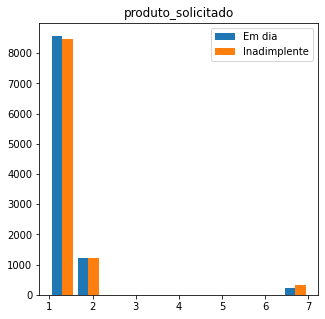

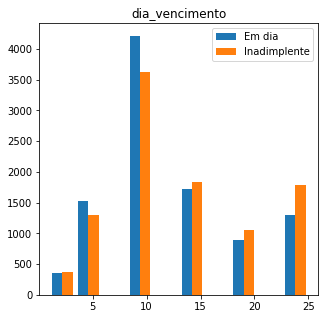

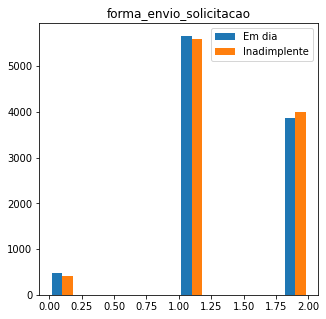

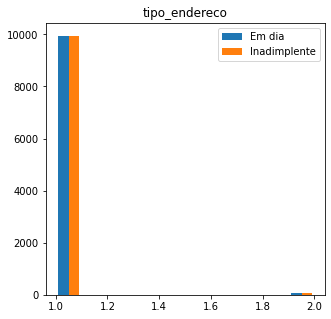

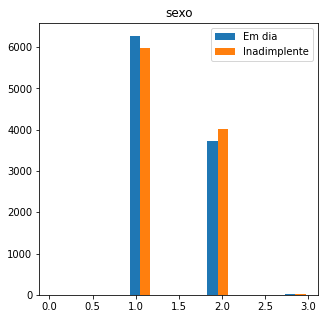

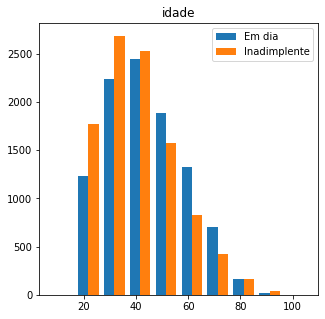

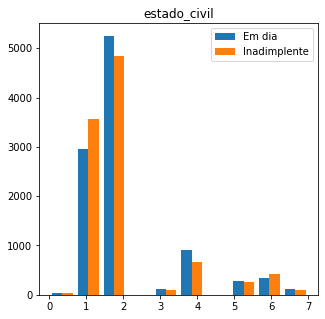

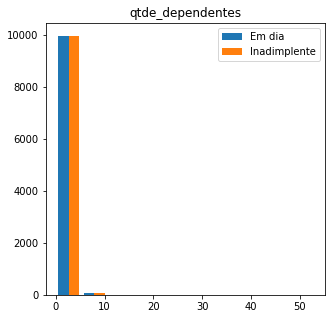

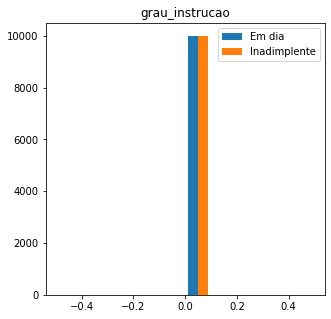

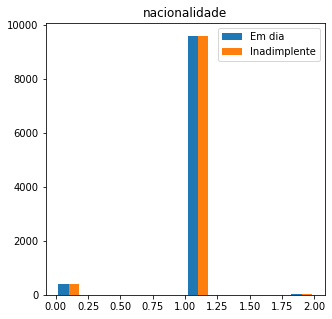

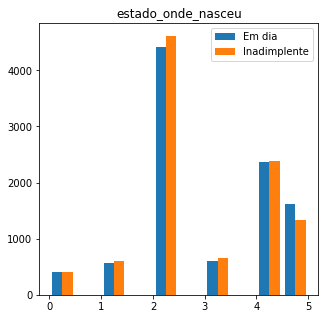

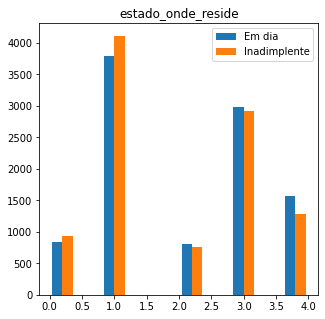

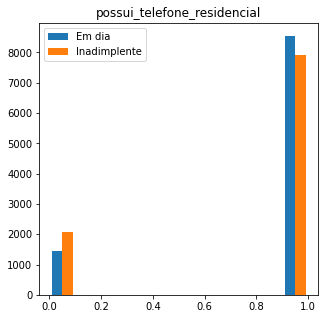

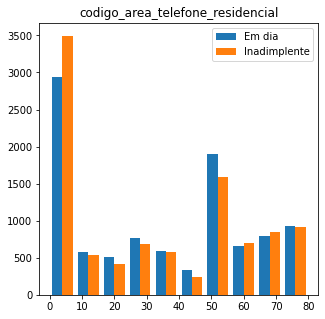

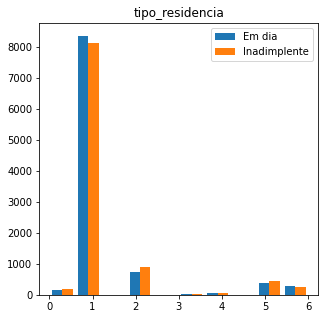

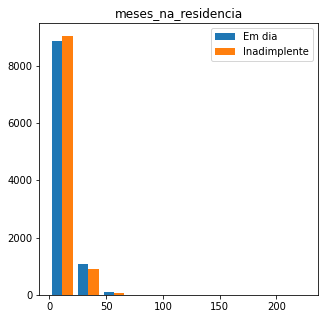

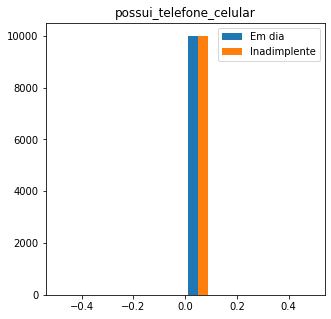

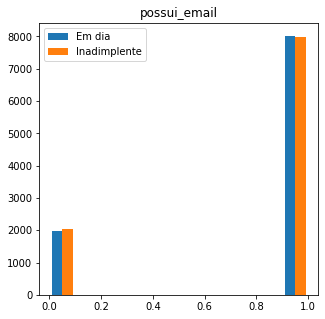

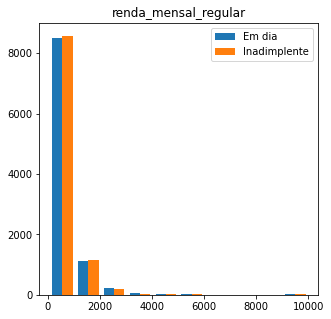

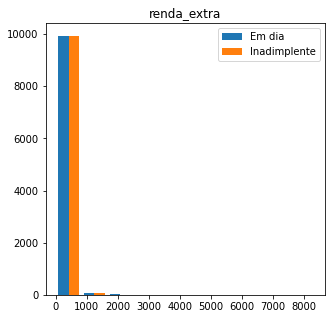

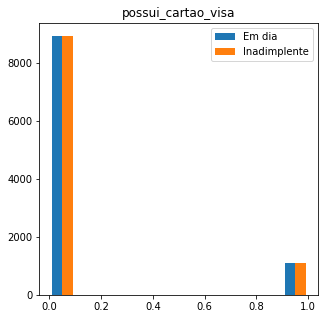

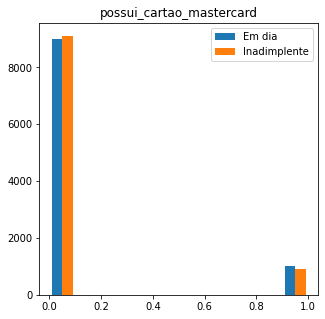

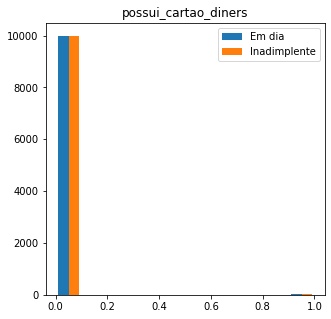

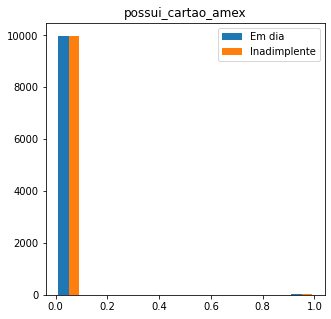

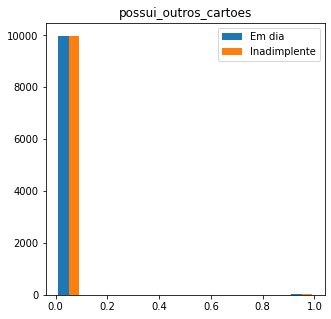

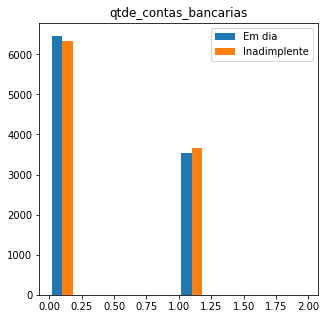

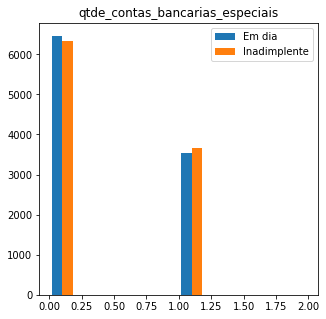

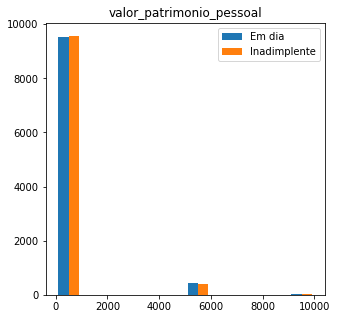

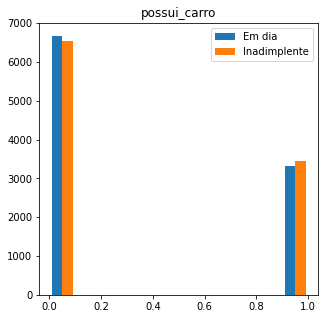

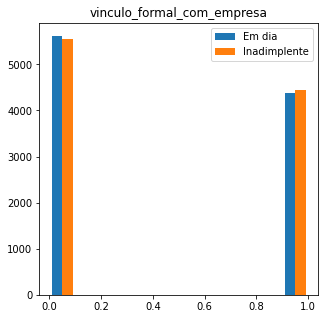

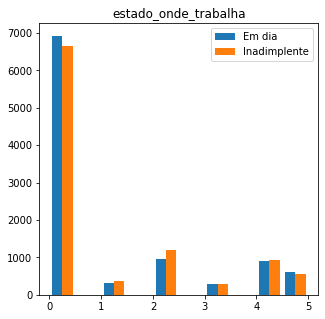

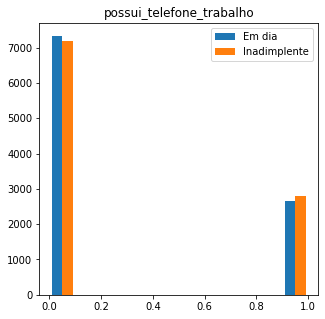

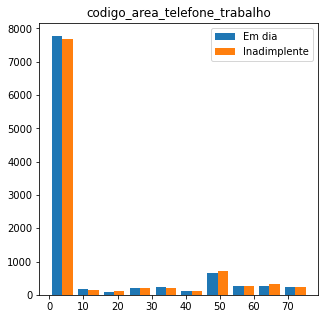

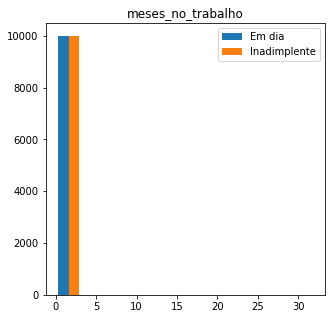

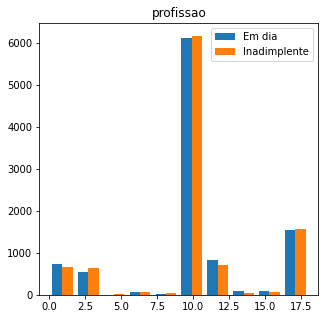

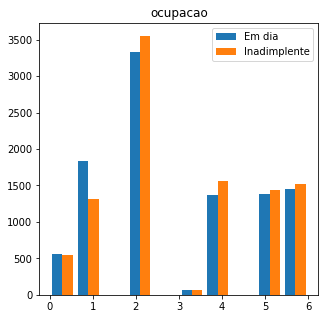

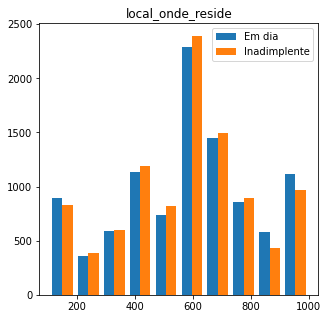

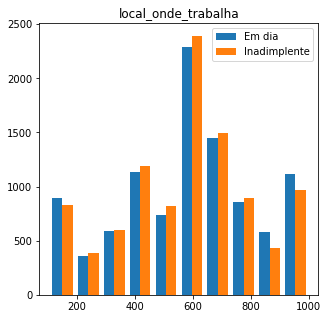

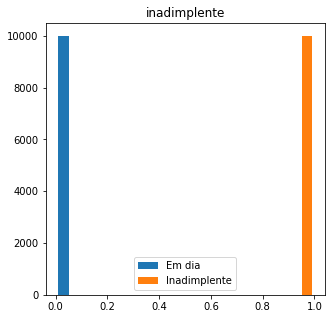

In [ ]:
plt.rcParams["figure.figsize"] = (5,5)
columns = df.columns
for i in range(columns.size):
  em_dia = df[df['inadimplente']==0][columns[i]]
  inadimplente = df[df['inadimplente']==1][columns[i]]
  plt.hist([em_dia,inadimplente])
  plt.legend(['Em dia', 'Inadimplente'])
  plt.title(columns[i])
  plt.show()

  

    Observando o histograma das variáveis, faremos algumas mudanças:

    A variavel renda extra passou a ser uma variável boolana já que grande 
    parte dos usuários não possui renda extra e aqueles com mais renda extra
    tendem a honrar mais a divida.
    As variaveis relativas a quantidade de contas também passaram a ser
    booleanas já que poucos clientes possuiam 2 ou mais contas.
    Além disso, as seguintes colunas:

    codigo_area_telefone_residencial -> com quase mil categorias é dificil
    obter informações relevantes sem causar o fenomeno de overfitting quando
    temos apenas 20000 exemlplos de usuários.

    grau_instrucao, possui_telefone_celular -> só possui uma categoria, logo, a
    entropia dessa coluna é nula.

    As mudanças comentadas foram feitas na tentativa de tirar colunas pouco 
    informativas ou aunda na tentativa de agrupar cateforias de cada variavel,
    mas não tivemos efeitos positivos então as mudaças foram desfeitas


In [ ]:
# #removeremos as variaveis com baixa variancia
# df = df.drop(columns=['tipo_endereco','qtde_dependentes','nacionalidade',
#                       'estado_onde_nasceu','estado_onde_reside','tipo_residencia',
#                       'possui_email','possui_cartao_visa','possui_cartao_diners',
#                       'possui_outros_cartoes','estado_onde_trabalha',
#                       'codigo_area_telefone_trabalho','meses_no_trabalho',
#                       'profissao','local_onde_reside','local_onde_trabalha',
#                       'possui_cartao_amex']) 
 
# df_test = df_test.drop(columns=['tipo_endereco','qtde_dependentes','nacionalidade',
#                                 'estado_onde_nasceu','estado_onde_reside','tipo_residencia',
#                                 'possui_email','possui_cartao_visa','possui_cartao_diners',
#                                 'possui_outros_cartoes','estado_onde_trabalha',
#                                 'codigo_area_telefone_trabalho','meses_no_trabalho',
#                                 'profissao','local_onde_reside','local_onde_trabalha',
#                                 'possui_cartao_amex'])  
  
#     #produto_solicitado :praticamente não temos produtos entre 2 e 6
# df.loc[df['produto_solicitado'] <2 ,'produto_solicitado'] = 0
# df.loc[df['produto_solicitado'] >=2 ,'produto_solicitado'] = 1

# df_test.loc[df_test['produto_solicitado'] < 2 ,'produto_solicitado'] = 0
# df_test.loc[df_test['produto_solicitado'] >=2 ,'produto_solicitado'] = 1

#     #dia_do_vencimento: quem paga no dia primeiro ou no fim do mes em geral é
#     #mais inadimplent, uma explicação é que empregos de cartira assinada em geral
#     # pagam o salário nos primeiros dias do mes
# df.loc[df['dia_vencimento'] == 1  ,'dia_vencimento'] = 0
# df.loc[df['dia_vencimento'] == 15  ,'dia_vencimento'] = 0
# df.loc[df['dia_vencimento'] == 20  ,'dia_vencimento'] = 0
# df.loc[df['dia_vencimento'] == 25  ,'dia_vencimento'] = 0
# df.loc[df['dia_vencimento'] == 5  ,'dia_vencimento'] = 1
# df.loc[df['dia_vencimento'] == 10  ,'dia_vencimento'] = 1

# df_test.loc[df_test['dia_vencimento'] == 1  ,'dia_vencimento'] = 0
# df_test.loc[df_test['dia_vencimento'] == 15  ,'dia_vencimento'] = 0
# df_test.loc[df_test['dia_vencimento'] == 20  ,'dia_vencimento'] = 0
# df_test.loc[df_test['dia_vencimento'] == 25  ,'dia_vencimento'] = 0
# df_test.loc[df_test['dia_vencimento'] == 5  ,'dia_vencimento'] = 1
# df_test.loc[df_test['dia_vencimento'] == 10  ,'dia_vencimento'] = 1

#     #pessoas com menos de 50 anos aparentemente são mais inadimplentes
# df.loc[df['idade'] <50 ,'idade'] = 0
# df.loc[df['idade'] >=50 ,'idade'] = 1

# df_test.loc[df_test['idade'] < 50 ,'idade'] = 0
# df_test.loc[df_test['idade'] >=50 ,'idade'] = 1

#     #pessoas que moram menos de 1 ano na residencia pagam tendem a ser mais inadimplentes
# df.loc[df['meses_na_residencia'] < 12 ,'meses_na_residencia'] = 0
# df.loc[df['meses_na_residencia'] >=12 ,'meses_na_residencia'] = 1

# df_test.loc[df_test['meses_na_residencia'] < 12 ,'meses_na_residencia'] = 0
# df_test.loc[df_test['meses_na_residencia'] >=12 ,'meses_na_residencia'] = 1

#     #embora quase não haja diferença, iremos categorizar as rendas em maior ou menos que 2000
# df.loc[df['renda_mensal_regular'] < 2000 ,'renda_mensal_regular'] = 0
# df.loc[df['renda_mensal_regular'] >=2000 ,'renda_mensal_regular'] = 1

# df_test.loc[df_test['renda_mensal_regular'] < 2000 ,'renda_mensal_regular'] = 0
# df_test.loc[df_test['renda_mensal_regular'] >=2000 ,'renda_mensal_regular'] = 1

    #pessoas com renda extra tender a ter mais mais dinhiero para arcar com empre´stimos
df.loc[df['renda_extra'] > 0 ,'renda_extra'] = 1
df_test.loc[df_test['renda_extra'] >0 ,'renda_extra'] = 1

    #separar contas bancarias em se tem ou não, já que praticamente não temos pessoes com mais de uma
df.loc[df['qtde_contas_bancarias'] > 0 ,'qtde_contas_bancarias'] = 1
df_test.loc[df_test['qtde_contas_bancarias'] >0 ,'qtde_contas_bancarias'] = 1

df.loc[df['qtde_contas_bancarias_especiais'] > 0 ,'qtde_contas_bancarias_especiais'] = 1
df_test.loc[df_test['qtde_contas_bancarias_especiais'] >0 ,'qtde_contas_bancarias_especiais'] = 1

#     #separar valor do patrimonio pessoal em 0 ou mais que 0
# df.loc[df['valor_patrimonio_pessoal'] > 0 ,'valor_patrimonio_pessoal'] = 1
# df_test.loc[df_test['valor_patrimonio_pessoal'] >0 ,'valor_patrimonio_pessoal'] = 1

df = df.drop(columns=['codigo_area_telefone_residencial','grau_instrucao','possui_telefone_celular'])
df_test = df_test.drop(columns=['codigo_area_telefone_residencial','grau_instrucao','possui_telefone_celular'])

In [ ]:
# plt.rcParams["figure.figsize"] = (5,5)
# columns = df.columns
# for i in range(columns.size):
#   em_dia = df[df['inadimplente']==0][columns[i]]
#   inadimplente = df[df['inadimplente']==1][columns[i]]
#   plt.hist([em_dia,inadimplente])
#   plt.legend(['Em dia', 'Inadimplente'])
#   plt.title(columns[i])
#   plt.show()

In [ ]:
df

,produto_solicitado,dia_vencimento,forma_envio_solicitacao,tipo_endereco,sexo,idade,estado_civil,qtde_dependentes,nacionalidade,estado_onde_nasceu,estado_onde_reside,possui_telefone_residencial,tipo_residencia,meses_na_residencia,possui_email,renda_mensal_regular,renda_extra,possui_cartao_visa,possui_cartao_mastercard,possui_cartao_diners,possui_cartao_amex,possui_outros_cartoes,qtde_contas_bancarias,qtde_contas_bancarias_especiais,valor_patrimonio_pessoal,possui_carro,vinculo_formal_com_empresa,estado_onde_trabalha,possui_telefone_trabalho,codigo_area_telefone_trabalho,meses_no_trabalho,profissao,ocupacao,local_onde_reside,local_onde_trabalha,inadimplente
0,1,10,2,1,2,85,2,0,1,2,1,1,1.0,12.0,0,480.0,0.0,0,0,0,0,0,1,1,0.0,1,0,0,0,0,0,9.0,1.0,600.0,600.0,0
1,1,25,1,1,1,38,1,0,1,2,1,1,1.0,5.0,1,380.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,2.0,5.0,492.0,492.0,0
2,1,20,1,1,1,37,2,0,1,2,1,1,5.0,1.0,1,600.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,18.0,6.0,450.0,450.0,1
3,1,20,1,1,2,37,1,1,1,5,4,1,1.0,1.0,1,460.0,0.0,0,0,0,0,0,0,0,0.0,0,1,5,1,51,0,9.0,2.0,932.0,932.0,1
4,7,1,1,1,1,51,1,3,1,2,1,1,0.0,1.0,1,687.0,1.0,0,0,0,0,0,0,0,0.0,1,1,2,0,0,0,9.0,5.0,440.0,440.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,10,2,1,2,27,2,0,1,4,3,1,2.0,0.0,1,423.0,0.0,0,0,0,0,0,1,1,0.0,1,1,0,0,0,0,9.0,1.0,308.0,308.0,0
19996,1,20,2,1,1,26,2,1,1,2,1,1,1.0,3.0,0,350.0,0.0,0,0,0,0,0,1,1,0.0,1,1,0,0,0,0,9.0,2.0,639.0,639.0,0
19997,1,10,1,1,1,63,2,0,1,2,1,1,5.0,25.0,1,321.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,9.0,1.0,486.0,486.0,0
19998,1,5,1,1,1,84,1,0,1,2,1,0,1.0,30.0,1,380.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,0,18.0,6.0,590.0,590.0,0


    Agora faremos one hot encoding a fim de só termos varivaies binarias,
    já que os modelos de machine learning lidam melhor com variáveis binárias
    do que com variáveis categóricas

In [ ]:
one_hot = pd.get_dummies(df_test['forma_envio_solicitacao'],prefix='forma_envio_solicitacao')
df_test = df_test.drop(columns=['forma_envio_solicitacao'])
df_test = df_test.join(one_hot)
one_hot = pd.get_dummies(df['forma_envio_solicitacao'],prefix='forma_envio_solicitacao')
df      = df.drop(columns=['forma_envio_solicitacao'])
df      = df.join(one_hot)

one_hot = pd.get_dummies(df_test['sexo'],prefix='sexo')
df_test = df_test.drop(columns=['sexo'])
df_test = df_test.join(one_hot)
one_hot = pd.get_dummies(df['sexo'],prefix='sexo')
df      = df.drop(columns=['sexo'])
df      = df.join(one_hot)

one_hot = pd.get_dummies(df_test['estado_civil'],prefix='estado_civil')
df_test = df_test.drop(columns=['estado_civil'])
df_test = df_test.join(one_hot)
one_hot = pd.get_dummies(df['estado_civil'],prefix='estado_civil')
df      = df.drop(columns=['estado_civil'])
df      = df.join(one_hot)

one_hot = pd.get_dummies(df_test['ocupacao'],prefix='ocupacao')
df_test = df_test.drop(columns=['ocupacao'])
df_test = df_test.join(one_hot)
one_hot = pd.get_dummies(df['ocupacao'],'ocupacao')
df      = df.drop(columns=['ocupacao'])
df      = df.join(one_hot)

one_hot = pd.get_dummies(df_test['estado_onde_nasceu'],prefix='estado_onde_nasceu')
df_test = df_test.drop(columns=['estado_onde_nasceu'])
df_test = df_test.join(one_hot)
one_hot = pd.get_dummies(df['estado_onde_nasceu'],'estado_onde_nasceu')
df      = df.drop(columns=['estado_onde_nasceu'])
df      = df.join(one_hot)


one_hot = pd.get_dummies(df_test['estado_onde_reside'],prefix='estado_onde_reside')
df_test = df_test.drop(columns=['estado_onde_reside'])
df_test = df_test.join(one_hot)
one_hot = pd.get_dummies(df['estado_onde_reside'],'estado_onde_reside')
df      = df.drop(columns=['estado_onde_reside'])
df      = df.join(one_hot)

one_hot = pd.get_dummies(df_test['estado_onde_trabalha'],prefix='estado_onde_trabalha')
df_test = df_test.drop(columns=['estado_onde_trabalha'])
df_test = df_test.join(one_hot)
one_hot = pd.get_dummies(df['estado_onde_trabalha'],'estado_onde_trabalha')
df      = df.drop(columns=['estado_onde_trabalha'])
df      = df.join(one_hot)

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import StandardScaler,RobustScaler,MinMaxScaler

y = df.pop('inadimplente')
X = df

In [ ]:
X

,produto_solicitado,dia_vencimento,tipo_endereco,idade,qtde_dependentes,nacionalidade,possui_telefone_residencial,tipo_residencia,meses_na_residencia,possui_email,renda_mensal_regular,renda_extra,possui_cartao_visa,possui_cartao_mastercard,possui_cartao_diners,possui_cartao_amex,possui_outros_cartoes,qtde_contas_bancarias,qtde_contas_bancarias_especiais,valor_patrimonio_pessoal,possui_carro,vinculo_formal_com_empresa,possui_telefone_trabalho,codigo_area_telefone_trabalho,meses_no_trabalho,profissao,local_onde_reside,local_onde_trabalha,forma_envio_solicitacao_0,forma_envio_solicitacao_1,forma_envio_solicitacao_2,sexo_0,sexo_1,sexo_2,sexo_3,estado_civil_0,estado_civil_1,estado_civil_2,estado_civil_3,estado_civil_4,estado_civil_5,estado_civil_6,estado_civil_7,ocupacao_0.0,ocupacao_1.0,ocupacao_2.0,ocupacao_3.0,ocupacao_4.0,ocupacao_5.0,ocupacao_6.0,estado_onde_nasceu_0,estado_onde_nasceu_1,estado_onde_nasceu_2,estado_onde_nasceu_3,estado_onde_nasceu_4,estado_onde_nasceu_5,estado_onde_reside_0,estado_onde_reside_1,estado_onde_reside_2,estado_onde_reside_3,estado_onde_reside_4,estado_onde_trabalha_0,estado_onde_trabalha_1,estado_onde_trabalha_2,estado_onde_trabalha_3,estado_onde_trabalha_4,estado_onde_trabalha_5
0,1,10,1,85,0,1,1,1.0,12.0,0,480.0,0.0,0,0,0,0,0,1,1,0.0,1,0,0,0,0,9.0,600.0,600.0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
1,1,25,1,38,0,1,1,1.0,5.0,1,380.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,2.0,492.0,492.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
2,1,20,1,37,0,1,1,5.0,1.0,1,600.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,18.0,450.0,450.0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,1,20,1,37,1,1,1,1.0,1.0,1,460.0,0.0,0,0,0,0,0,0,0,0.0,0,1,1,51,0,9.0,932.0,932.0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1
4,7,1,1,51,3,1,1,0.0,1.0,1,687.0,1.0,0,0,0,0,0,0,0,0.0,1,1,0,0,0,9.0,440.0,440.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,1,10,1,27,0,1,1,2.0,0.0,1,423.0,0.0,0,0,0,0,0,1,1,0.0,1,1,0,0,0,9.0,308.0,308.0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0
19996,1,20,1,26,1,1,1,1.0,3.0,0,350.0,0.0,0,0,0,0,0,1,1,0.0,1,1,0,0,0,9.0,639.0,639.0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
19997,1,10,1,63,0,1,1,5.0,25.0,1,321.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,9.0,486.0,486.0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0
19998,1,5,1,84,0,1,0,1.0,30.0,1,380.0,0.0,0,0,0,0,0,0,0,0.0,0,0,0,0,0,18.0,590.0,590.0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0


    Nesse ponto, nós temos 67 colunas, iremos reduzir a 40 usando a função
    SelectKBest e o critério Chi2, ou seja, removeremos as 27 variávei com maior
    chance de serem idependentes da saída, dessa forma, irrelevante para a
    classificação.
    Além disso, escalaremos as variáveis usando o MinMax para que todas as
    variáveis estejam no mesmo intervalo, o que ajuda no treinamento de alguns
    tipos de algoritmos

In [ ]:
  seletor = SelectKBest(chi2, k=40)
  seletor.fit(X,y)
  X_train = seletor.transform(X)
  X_test = df_test

  X_test = seletor.transform(X_test)


  scaler = MinMaxScaler()
  scaler.fit_transform(X_train)
  X_train = scaler.transform(X_train)
  X_test = scaler.transform(X_test)

  X_train,X_val,y_train,y_val = train_test_split(X_train,y,test_size=0.1)

    A seguir, treinamos o primeiro modelo, uma rede neural com duas camadas, 
    além da saída. Além das camadas com 25 neurônios cada, adicionamos uma
    camada de adição de ruído, que adiciona ruído nas entradas na fase de
    treinamento, além de ser uma forma de data augumentation, isso possibilita
    que a rede neural seja menos afetada com pequenas flutuações nas entradas na
    fase de inferência. Ademais, adiocionamos regularização L2 e uma camada de 
    batch normalization para evitar overfitting. A rede neural foi treinadas por
    40 epochs, mas salvamos o melhor com melhor acurácia no dataset de validação
    durante o treinamento, para evitar obter um modelo que memorizou as entradas
    da fase treinamento.

In [ ]:
from tensorflow.keras.constraints import max_norm
Model = keras.Sequential()

N = 25

Model.add(tf.keras.Input(shape=(X_train.shape[1],)))

Model.add(layers.GaussianNoise(1e-1))

Model.add(layers.Dense(N,activation = 'relu',kernel_regularizer=regularizers.l2(l2=1e-3)))
Model.add(layers.BatchNormalization())
Model.add(layers.Dense(N,activation = 'relu',kernel_regularizer=regularizers.l2(l2=1e-3)))


Model.add(layers.Dense(1, activation='sigmoid',bias_constraint=max_norm(0.5)))

opt = keras.optimizers.Adam(learning_rate=1E-4,amsgrad=True)
Model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
Model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gaussian_noise_1 (GaussianNo (None, 40)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1025      
_________________________________________________________________
batch_normalization_1 (Batch (None, 25)                100       
_________________________________________________________________
dense_4 (Dense)              (None, 25)                650       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 26        
Total params: 1,801
Trainable params: 1,751
Non-trainable params: 50
_________________________________________________________________


In [ ]:
from keras.callbacks import ModelCheckpoint

checkpoint = ModelCheckpoint("best_model.hdf5", monitor='val_accuracy', verbose=1,
    save_best_only=True, mode='auto', period=1)

Model.fit(X_train,
          y_train,
          epochs=40,
          batch_size=32,
          shuffle=True,
          validation_data=(X_val, y_val),
          callbacks=checkpoint)



In [ ]:
Model.load_weights("best_model.hdf5")
Model.evaluate(X_train,y_train)

Model.evaluate(X_val,y_val)

63/63 [==============================] - 0s 926us/step - loss: 0.6896 - accuracy: 0.5930


[0.6896384954452515, 0.5929999947547913]

    Como as variáveis em geral possuem pouca entropia, ou seja, são pouco
    correlacionadas com a saíde, é dificil contruir um modelo muito acurado.
    Contudo, vemos que a regularização foi eficaz, pois não há uma diferença
    muito grande entre o erro no dataset de treino, ~39.5%, e no dataset de
    validação, 40.7%.

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


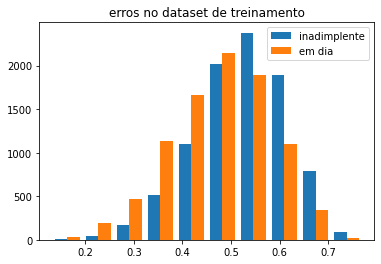

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


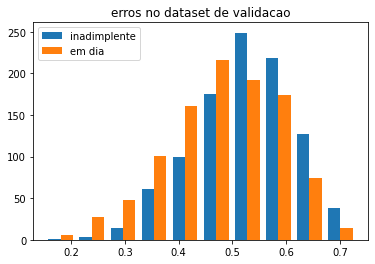

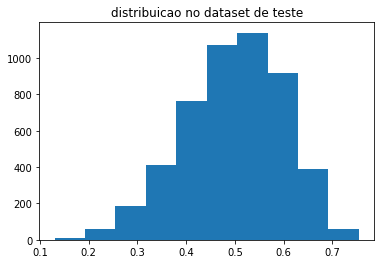

In [ ]:
y_dnn = Model.predict(X_train)
plt.hist([y_dnn[y_train==1],y_dnn[y_train==0]])
plt.legend(['inadimplente','em dia'])
plt.title('erros no dataset de treinamento')
plt.show()

y_dnn = Model.predict(X_val)
plt.hist([y_dnn[y_val==1],y_dnn[y_val==0]])
plt.legend(['inadimplente','em dia'])
plt.title('erros no dataset de validacao')
plt.show()

y_dnn = Model.predict(X_test)
plt.hist(y_dnn)
plt.title('distribuicao no dataset de teste')
plt.show()

    Pelo histograma dos logit, vimos classificar o tipo de usuário baseado,
    apenas, nas informações desse dataset

In [ ]:
#salvar CSV com as respostas


y_dnn[y_dnn>=0.5] = 1
y_dnn[y_dnn<0.5] = 0

aux = pd.read_csv('/content/drive/MyDrive/Faculdade/7º período/Introdução a Machine Learning/conjunto_de_teste.csv')
resposta = pd.DataFrame({'id_solicitante':aux.pop('id_solicitante'), 'inadimplente':np.squeeze(np.int16(y_dnn))})
resposta.to_csv("/content/drive/MyDrive/Faculdade/7º período/Introdução a Machine Learning/resposta.csv",index=False)
resposta.to_csv("/content/resposta.csv",index=False)

    A seguir, temos um modelo de random forest, que basicamente realiza a
    clasificação baseada na saída mais votada de várias arvores de decisão. 
    Foram realizados alguns testes com alguns hiperparâmetros, mas não foi feito
    um grid search. Podemos observar que o modelo também sofre com overfitting,
    já que o erro no dataset de validação está quase 10% maior do que no
    dataset de treinamento. 


In [ ]:

from sklearn.ensemble import RandomForestClassifier

name = "Random Forest"
clf= RandomForestClassifier(max_depth=10, n_estimators=200, max_features=7)

clf.fit(X_train, y_train)
score = clf.score(X_val, y_val)
print(f'{name}:\t{score}')

Random Forest:	0.5895


In [ ]:
score = clf.score(X_train, y_train)
print(f'{name}:\t{score}')

Random Forest:	0.7299444444444444


In [ ]:
y_rnd_forest = clf.predict(X_test)
aux = pd.read_csv('/content/drive/MyDrive/Faculdade/7º período/Introdução a Machine Learning/conjunto_de_teste.csv')
resposta_rnd_forest = pd.DataFrame({'id_solicitante':aux.pop('id_solicitante'), 'inadimplente':np.squeeze(np.int16(y_rnd_forest))})
resposta_rnd_forest.to_csv("/content/drive/MyDrive/Faculdade/7º período/Introdução a Machine Learning/resposta_rnd_forest.csv",index=False)
resposta_rnd_forest.to_csv("/content/resposta_rnd_forest.csv",index=False)

    Por fim, ressaltamos que dada a baixa qualidade dos dados os algoritmos não
    puderam ter desempenho superior, já que a qualidade e quantidade dos dados
    são um fator importante no treinamento de modelos de machine learning. Além
    disso, embora o modelo de random forest tenha se saído ligeiramente melhor
    , 1%, no conjunto de teste público do kaggle, ele apresentou muito mais
    overfitting, o que não aconteceu na rede neural dadas as técnicas de
    regularização e normalização empregadas.